<a href="https://colab.research.google.com/github/ShubhamML/PaddleOCR/blob/main/PaddleOCR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Install and Import Dependencies

In [1]:
# GitHub repo installation of paddle
!pip install paddlepaddle

     |████████████████████████████████| 108.4 MB 22 kB/s 


In [2]:
# Install paddle OCR
!pip install paddleocr

     |████████████████████████████████| 288 kB 5.3 MB/s 
     |████████████████████████████████| 2.7 MB 40.5 MB/s 
     |████████████████████████████████| 55.7 MB 1.4 MB/s 
     |████████████████████████████████| 1.1 MB 29.6 MB/s 
     |████████████████████████████████| 603 kB 37.6 MB/s 
     |████████████████████████████████| 948 kB 38.7 MB/s 
     |████████████████████████████████| 50 kB 5.9 MB/s 
     |████████████████████████████████| 43 kB 1.5 MB/s 
     |████████████████████████████████| 404 kB 47.7 MB/s 
     |████████████████████████████████| 195 kB 48.4 MB/s 
     |████████████████████████████████| 2.1 MB 36.7 MB/s 
     |████████████████████████████████| 127 kB 45.0 MB/s 
     |████████████████████████████████| 64 kB 2.7 MB/s 
     |████████████████████████████████| 42 kB 919 kB/s 
     |████████████████████████████████| 69 kB 7.6 MB/s 
     |████████████████████████████████| 2.0 MB 33.4 MB/s 
     |████████████████████████████████| 596 kB 50.1 MB/s 
     |███████████████████

In [3]:
# Clone paddle OCR repo - get FONTS for visualization
!git clone https://github.com/PaddlePaddle/PaddleOCR

Cloning into 'PaddleOCR'...
remote: Enumerating objects: 31012, done.
remote: Counting objects: 100% (213/213), done.
remote: Compressing objects: 100% (136/136), done.
remote: Total 31012 (delta 91), reused 170 (delta 77), pack-reused 30799
Receiving objects: 100% (31012/31012), 260.68 MiB | 22.19 MiB/s, done.
Resolving deltas: 100% (21303/21303), done.


In [4]:
from paddleocr import PaddleOCR, draw_ocr# main OCR dependencies
from matplotlib import pyplot as plt # plot images
import cv2 #opencv
import os # folder directory navigation

/usr/local/lib/python3.7/dist-packages/scipy/fft/__init__.py:97: DeprecationWarning: The module numpy.dual is deprecated.  Instead of using dual, use the functions directly from numpy or scipy.
  from numpy.dual import register_func
/usr/local/lib/python3.7/dist-packages/scipy/special/orthogonal.py:81: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  from numpy import (exp, inf, pi, sqrt, floor, sin, cos, around, int,
/usr/local/lib/python3.7/dist-packages/scipy/sparse/sputils.py:17: DeprecationWarning: `np.typeDict` is a deprecated alias for `np.sc

# 2. Instantiate Model and Detect

In [5]:
# Setup model
img_path='/content/UConn_BusCards-revisions-1.jpg'
ocr = PaddleOCR(lang='en')

download https://paddleocr.bj.bcebos.com/dygraph_v2.0/multilingual/en_ppocr_mobile_v2.0_det_infer.tar to /root/.paddleocr/2.4/ocr/det/en/en_ppocr_mobile_v2.0_det_infer/en_ppocr_mobile_v2.0_det_infer.tar


100%|██████████| 3.16M/3.16M [00:11<00:00, 275kiB/s]


download https://paddleocr.bj.bcebos.com/dygraph_v2.0/multilingual/en_number_mobile_v2.0_rec_infer.tar to /root/.paddleocr/2.4/ocr/rec/en/en_number_mobile_v2.0_rec_infer/en_number_mobile_v2.0_rec_infer.tar


100%|██████████| 2.70M/2.70M [01:40<00:00, 26.8kiB/s]


download https://paddleocr.bj.bcebos.com/dygraph_v2.0/ch/ch_ppocr_mobile_v2.0_cls_infer.tar to /root/.paddleocr/2.4/ocr/cls/ch_ppocr_mobile_v2.0_cls_infer/ch_ppocr_mobile_v2.0_cls_infer.tar


100%|██████████| 1.45M/1.45M [00:43<00:00, 33.4kiB/s]


Namespace(benchmark=False, cls_batch_num=6, cls_image_shape='3, 48, 192', cls_model_dir='/root/.paddleocr/2.4/ocr/cls/ch_ppocr_mobile_v2.0_cls_infer', cls_thresh=0.9, cpu_threads=10, crop_res_save_dir='./output', det=True, det_algorithm='DB', det_db_box_thresh=0.6, det_db_score_mode='fast', det_db_thresh=0.3, det_db_unclip_ratio=1.5, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_east_score_thresh=0.8, det_limit_side_len=960, det_limit_type='max', det_model_dir='/root/.paddleocr/2.4/ocr/det/en/en_ppocr_mobile_v2.0_det_infer', det_pse_box_thresh=0.85, det_pse_box_type='box', det_pse_min_area=16, det_pse_scale=1, det_pse_thresh=0, det_sast_nms_thresh=0.2, det_sast_polygon=False, det_sast_score_thresh=0.5, draw_img_save_dir='./inference_results', drop_score=0.5, e2e_algorithm='PGNet', e2e_char_dict_path='./ppocr/utils/ic15_dict.txt', e2e_limit_side_len=768, e2e_limit_type='max', e2e_model_dir=None, e2e_pgnet_mode='fast', e2e_pgnet_score_thresh=0.5, e2e_pgnet_valid_set='totaltext'

In [8]:
# Run the ocr method on the ocr model
result = ocr.ocr(img_path)

[2022/03/07 11:11:16] root WARNING: Since the angle classifier is not initialized, the angle classifier will not be uesd during the forward process
[2022/03/07 11:11:16] root DEBUG: dt_boxes num : 12, elapse : 0.1523747444152832
[2022/03/07 11:11:17] root DEBUG: rec_res num  : 12, elapse : 0.5423102378845215


In [9]:
result

[[[[27.0, 25.0], [199.0, 25.0], [199.0, 59.0], [27.0, 59.0]],
  ('UCONN', 0.9961774)],
 [[[226.0, 25.0], [375.0, 26.0], [375.0, 41.0], [226.0, 40.0]],
  ('FirstName LastName', 0.97451264)],
 [[[227.0, 39.0], [263.0, 42.0], [262.0, 57.0], [226.0, 54.0]],
  ('Title1', 0.9988603)],
 [[[29.0, 65.0], [197.0, 65.0], [197.0, 77.0], [29.0, 77.0]],
  ('UNIVERSITYOFCONNECTICUT', 0.99871993)],
 [[[227.0, 58.0], [262.0, 58.0], [262.0, 72.0], [227.0, 72.0]],
  ('Title2', 0.9959474)],
 [[[229.0, 73.0], [261.0, 73.0], [261.0, 87.0], [229.0, 87.0]],
  ('Title3', 0.99855095)],
 [[[25.0, 157.0], [164.0, 157.0], [164.0, 171.0], [25.0, 171.0]],
  ('Department or office', 0.97794074)],
 [[[24.0, 174.0], [219.0, 174.0], [219.0, 187.0], [24.0, 187.0]],
  ('School/College.Dept.or Entity', 0.96792865)],
 [[[26.0, 192.0], [224.0, 192.0], [224.0, 206.0], [26.0, 206.0]],
  ('123NameHere RoadUnit 3144', 0.9818421)],
 [[[24.0, 210.0], [172.0, 210.0], [172.0, 223.0], [24.0, 223.0]],
  ('Storrs.CT06268-3144', 0.97499

In [10]:
for res in result:
    print(res[1][0]) 

UCONN
FirstName LastName
Title1
UNIVERSITYOFCONNECTICUT
Title2
Title3
Department or office
School/College.Dept.or Entity
123NameHere RoadUnit 3144
Storrs.CT06268-3144
PHONE860-486-XXXXFAX860-486-XXXX
firstname.lastname@uconn.edu uconn.edt


# 3. Visualising Results

In [11]:
# Extracting detected components
boxes = [res[0] for res in result] # 
texts = [res[1][0] for res in result]
scores = [res[1][1] for res in result]

In [12]:
# Specifying font path for draw_ocr method
font_path = os.path.join('PaddleOCR', 'doc', 'fonts', 'latin.ttf')

In [14]:
# Import our image - drug 1/2/3
# imports image
img = cv2.imread(img_path) 

# reorders the color channels
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 

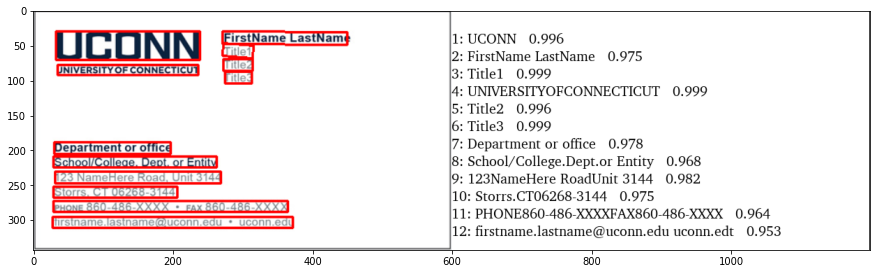

In [15]:
# Visualize our image and detections
# resizing display area
plt.figure(figsize=(15,15))

# draw annotations on image
annotated = draw_ocr(img, boxes, texts, scores, font_path=font_path) 
-------------------------------------
# show the image using matplotlib
plt.imshow(annotated) 